## Tweet Emotion Recognition: Natural Language Processing with TensorFlow

---

Dataset: [Tweet Emotion Dataset](https://github.com/dair-ai/emotion_dataset)

This is a starter notebook for the guided project [Tweet Emotion Recognition with TensorFlow](https://www.coursera.org/projects/tweet-emotion-tensorflow)

A complete version of this notebook is available in the course resources

---

## Task 1: Introduction

## Task 2: Setup and Imports

1. Installing Hugging Face's nlp package
2. Importing libraries

In [1]:
!pip install nlp

     |████████████████████████████████| 1.7 MB 3.6 MB/s 
     |████████████████████████████████| 243 kB 40.8 MB/s 


In [43]:
%matplotlib inline

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import nlp
import random


def show_history(h):
    epochs_trained = len(h.history['loss'])
    plt.figure(figsize=(16, 6))

    plt.subplot(1, 2, 1)
    plt.plot(range(0, epochs_trained), h.history.get('accuracy'), label='Training')
    plt.plot(range(0, epochs_trained), h.history.get('val_accuracy'), label='Validation')
    plt.ylim([0., 1.])
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(range(0, epochs_trained), h.history.get('loss'), label='Training')
    plt.plot(range(0, epochs_trained), h.history.get('val_loss'), label='Validation')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    
def show_confusion_matrix(y_true, y_pred, classes):
    from sklearn.metrics import confusion_matrix
    
    cm = confusion_matrix(y_true, y_pred, normalize='true')

    plt.figure(figsize=(8, 8))
    sp = plt.subplot(1, 1, 1)
    ctx = sp.matshow(cm)
    plt.xticks(list(range(0, 6)), labels=classes)
    plt.yticks(list(range(0, 6)), labels=classes)
    plt.colorbar(ctx)
    plt.show()

    
print('Using TensorFlow version', tf.__version__)

Using TensorFlow version 2.5.0


## Task 3: Importing Data

1. Importing the Tweet Emotion dataset
2. Creating train, validation and test sets
3. Extracting tweets and labels from the examples

In [44]:
dataset = nlp.load_dataset('emotion')

Using custom data configuration default


In [45]:
dataset

{'test': Dataset(features: {'text': Value(dtype='string', id=None), 'label': Value(dtype='string', id=None)}, num_rows: 2000),
 'train': Dataset(features: {'text': Value(dtype='string', id=None), 'label': Value(dtype='string', id=None)}, num_rows: 16000),
 'validation': Dataset(features: {'text': Value(dtype='string', id=None), 'label': Value(dtype='string', id=None)}, num_rows: 2000)}

In [46]:
train = dataset['train']
test = dataset['test']
val = dataset['validation']


In [47]:
def get_tweet(data):
  tweets = [x['text'] for x in data]
  labels = [x['label'] for x in data]
  return tweets, labels

In [48]:
tweets, labels = get_tweet(train)

In [49]:
tweets[0:15], labels[0:15]

(['i didnt feel humiliated',
  'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake',
  'im grabbing a minute to post i feel greedy wrong',
  'i am ever feeling nostalgic about the fireplace i will know that it is still on the property',
  'i am feeling grouchy',
  'ive been feeling a little burdened lately wasnt sure why that was',
  'ive been taking or milligrams or times recommended amount and ive fallen asleep a lot faster but i also feel like so funny',
  'i feel as confused about life as a teenager or as jaded as a year old man',
  'i have been with petronas for years i feel that petronas has performed well and made a huge profit',
  'i feel romantic too',
  'i feel like i have to make the suffering i m seeing mean something',
  'i do feel that running is a divine experience and that i can expect to have some type of spiritual encounter',
  'i think it s the easiest time of year to feel dissatisfied',
  'i feel low energy i

In [50]:
tweets[0], labels[0]

('i didnt feel humiliated', 'sadness')

## Task 4: Tokenizer

1. Tokenizing the tweets

In [51]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [52]:
tokenizer = Tokenizer(num_words = 10000, oov_token= '<UNK>')
tokenizer.fit_on_texts(tweets)


In [53]:
tokenizer.texts_to_sequences([tweets[0]])

[[2, 139, 3, 679]]

In [54]:
tweets[0]

'i didnt feel humiliated'

## Task 5: Padding and Truncating Sequences

1. Checking length of the tweets
2. Creating padded sequences

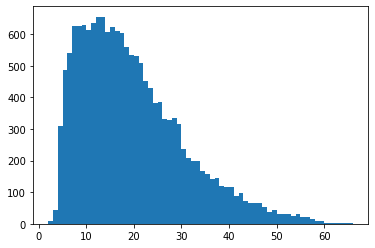

In [55]:
lengths = [len(i.split(' ')) for i in tweets]
plt.hist(lengths, bins = len(set(lengths)))
plt.show()

In [58]:
maxlen = 50

from tensorflow.keras.preprocessing.sequence import pad_sequences

In [59]:
def get_sequences(tokenizer, tweets):
  sequences = tokenizer.texts_to_sequences(tweets)
  padded = pad_sequences(sequences, truncating='post', padding='post', maxlen=maxlen)
  return padded

In [60]:
padded_train_seq = get_sequences(tokenizer, tweets)

In [61]:
padded_train_seq[0]

array([  2, 139,   3, 679,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0], dtype=int32)

## Task 6: Preparing the Labels

1. Creating classes to index and index to classes dictionaries
2. Converting text labels to numeric labels

In [62]:
classes = set(labels)
print(classes)

{'joy', 'sadness', 'surprise', 'anger', 'love', 'fear'}


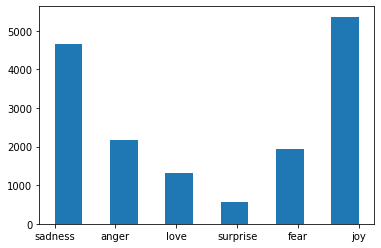

In [63]:
plt.hist(labels, bins=11)
plt.show()

In [64]:
class_to_index = dict((c, i) for i, c in enumerate(classes))
index_to_class = dict((v, k) for k, v in class_to_index.items())

In [65]:
class_to_index

{'anger': 3, 'fear': 5, 'joy': 0, 'love': 4, 'sadness': 1, 'surprise': 2}

In [66]:
index_to_class

{0: 'joy', 1: 'sadness', 2: 'surprise', 3: 'anger', 4: 'love', 5: 'fear'}

In [67]:
names_to_ids = lambda labels: np.array([class_to_index.get(x) for x in labels])

In [68]:
train_labels = names_to_ids(labels)
print(train_labels[0])

1


## Task 7: Creating the Model

1. Creating the model
2. Compiling the model

In [69]:
model = tf.keras.models.Sequential([
        tf.keras.layers.Embedding(10000, 16, input_length= maxlen),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20, return_sequences = True)),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20)),
        tf.keras.layers.Dense(6, activation='softmax')
])

model.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

In [70]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 50, 16)            160000    
_________________________________________________________________
bidirectional_4 (Bidirection (None, 50, 40)            5920      
_________________________________________________________________
bidirectional_5 (Bidirection (None, 40)                9760      
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 246       
Total params: 175,926
Trainable params: 175,926
Non-trainable params: 0
_________________________________________________________________


## Task 8: Training the Model

1. Preparing a validation set
2. Training the model

In [71]:
val_tweets, val_labels = get_tweet(val)
val_seq = get_sequences(tokenizer, val_tweets)
val_labels = names_to_ids(val_labels)

In [72]:
val_tweets[0], val_labels[0]

('im feeling quite sad and sorry for myself but ill snap out of it soon', 1)

In [73]:
h = model.fit(
    padded_train_seq, train_labels,
    validation_data= (val_seq, val_labels),
    epochs=20,
    callbacks=[
               tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2)
    ]
)

Epoch 1/20
500/500 [==============================] - 36s 61ms/step - loss: 1.3793 - accuracy: 0.4565 - val_loss: 1.0875 - val_accuracy: 0.5925
Epoch 2/20
500/500 [==============================] - 29s 57ms/step - loss: 0.6908 - accuracy: 0.7601 - val_loss: 0.6200 - val_accuracy: 0.7925
Epoch 3/20
500/500 [==============================] - 29s 57ms/step - loss: 0.3073 - accuracy: 0.9001 - val_loss: 0.4149 - val_accuracy: 0.8760
Epoch 4/20
500/500 [==============================] - 29s 58ms/step - loss: 0.1965 - accuracy: 0.9383 - val_loss: 0.3937 - val_accuracy: 0.8735
Epoch 5/20
500/500 [==============================] - 29s 59ms/step - loss: 0.1426 - accuracy: 0.9559 - val_loss: 0.4285 - val_accuracy: 0.8805
Epoch 6/20
500/500 [==============================] - 29s 57ms/step - loss: 0.1220 - accuracy: 0.9599 - val_loss: 0.4109 - val_accuracy: 0.8805
Epoch 7/20
500/500 [==============================] - 29s 57ms/step - loss: 0.1029 - accuracy: 0.9668 - val_loss: 0.4179 - val_accuracy:

## Task 9: Evaluating the Model

1. Visualizing training history
2. Prepraring a test set
3. A look at individual predictions on the test set
4. A look at all predictions on the test set

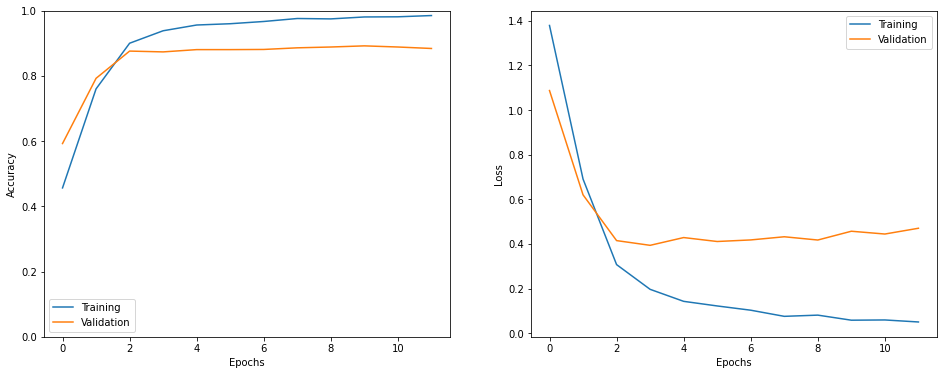

In [74]:
show_history(h)

In [75]:
test_tweets, test_labels = get_tweet(test)
test_seq = get_sequences(tokenizer, test_tweets)
test_labels = names_to_ids(test_labels)

In [76]:
_ = model.evaluate(test_seq, test_labels)

63/63 [==============================] - 1s 20ms/step - loss: 0.4654 - accuracy: 0.8825


In [84]:
i = random.randint(0, len(test_labels)-1)

print("Sentance:", test_tweets[i])
print("Label:", index_to_class[test_labels[i]])

p = model.predict_classes(np.expand_dims(test_seq[i], axis =0))[0]
print("prediction: ", index_to_class.get(p))

Sentance: i just feel extremely comfortable with the group of people that i dont even need to hide myself
Label: joy
prediction:  joy


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [85]:
preds = model.predict_classes(test_seq)
preds.shape, test_labels.shape

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


((2000,), (2000,))

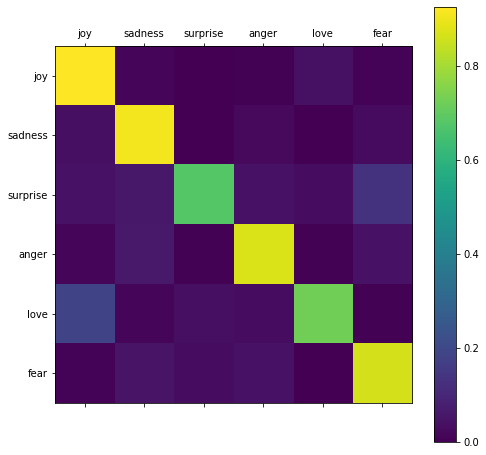

In [86]:
show_confusion_matrix(test_labels, preds, list(classes))